<h1>Zadanie 2</h1>
Przeprowadzić analizę eksperymentową następujących funkcji

In [1]:
import random
import time
import numpy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def sequence(n):
    return [random.randint(-1000,1000) for i in range(n)]


In [2]:
def example1(S):
    """Return the sum of the elements in sequence S."""
    n = len(S)
    total = 0
    for j in range(n):
        total += S[j]
    return total

def example2(S):
    """Return the sum of the elements with even index in sequence S.
    """
    n = len(S)
    total = 0
    for j in range(0, n, 2):
        total += S[j]
    return total

def example3(S):
    """Return the sum of the prex sums of sequence S."""
    n = len(S)
    total = 0
    for j in range(n):
        for k in range(1+j):
            total += S[k]
    return total

def example4(A, B): # assume that A and B have equal length
    """Return the number of elements in B equal to the sum of prex
    sums in A."""
    n = len(A)
    count = 0
    for i in range(n):
        total = 0
        for j in range(n):
            for k in range(1+j):
                total += A[k]
        if B[i] == total:
            count += 1
    return count


In [65]:
def get_time1(S):
    t = time.time()
    example1(S)
    t = time.time() - t
    return t

def get_time2(S):
    t = time.time()
    example2(S)
    t = time.time() - t
    return t

def get_time3(S):
    t = time.time()
    example3(S)
    t = time.time() - t
    return t

def get_time4(A,B):
    t = time.time()
    example4(A,B)
    t = time.time() - t
    return t

<h3>Example 1</h3>
Wykonajmy pierwszą funkcję dla zestawu danych i zmierzmy czas każdego wykonania za pomocą funkcji get_time1

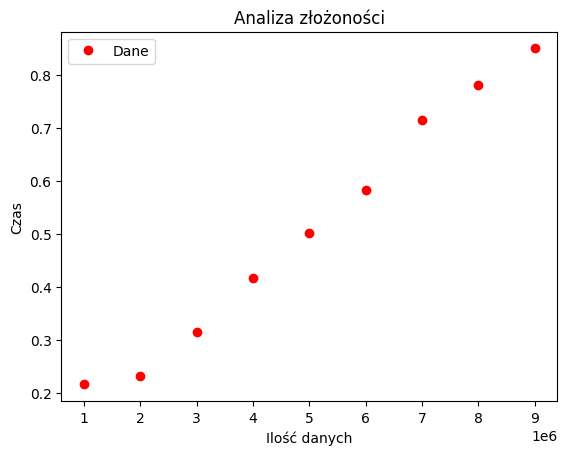

In [47]:
n1 = [i*100000 for i in range(10,100,10)]
times1 = [get_time1(sequence(el)) for el in n1]

plt.plot(n1,times1,'ro',label="Dane")
plt.xlabel("Ilość danych")
plt.ylabel("Czas")
plt.legend(loc='upper left')
plt.title("Analiza złożoności")
plt.show()

Można łatwo zauważyć że wyniki padają w okolicy pewnej funkcji liniowej y=ax+b, znajdźmy ją za pomocą funkcji curve_fit

a = 8.593923648198445e-08 , b = 0.082733690738678


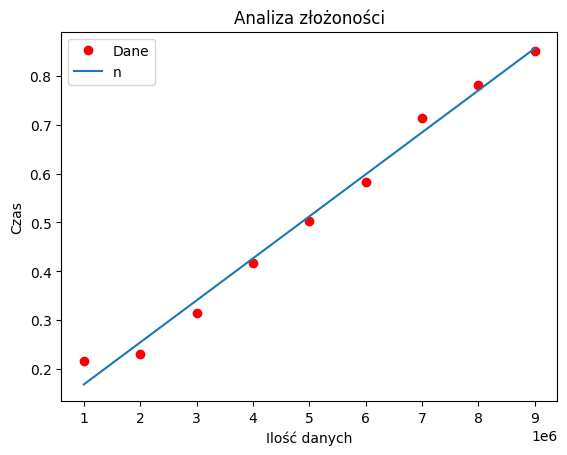

In [48]:
def func(x,a,b):
    return a*x+b

x_range = numpy.arange(n1[0],n1[-1],100)


popt1, pcov1 = curve_fit(func,n1,times1)
print("a = %s , b = %s" % (popt1[0], popt1[1]))

plt.plot(n1,times1,'ro',label="Dane")
plt.plot(x_range,func(x_range,*popt1),label="n")
plt.xlabel("Ilość danych")
plt.ylabel("Czas")
plt.legend(loc='upper left')
plt.title("Analiza złożoności")
plt.show()


teraz możemy przewidzieć z dokładnością kilku setnych sekund ile zajmie przetworzenie danego rozmiaru danych

In [56]:
print(func(10000000,*popt1))
print(get_time1(sequence(10000000)))

0.9421260555585225
1.0638651847839355


<h3>Example 2</h3>
Wykonajmy te same procedury dla drugiej funkcji

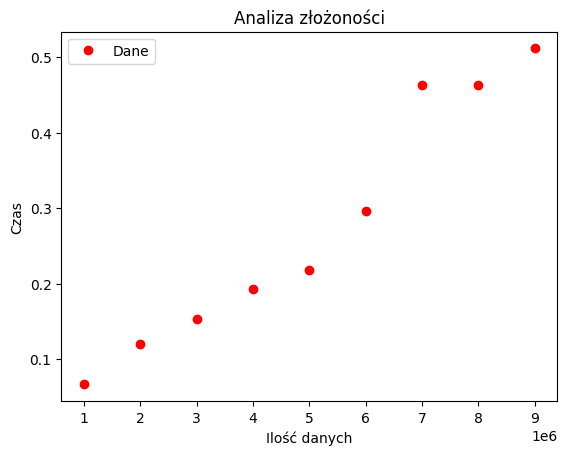

In [57]:
n2 = [i*100000 for i in range(10,100,10)]
times2 = [get_time2(sequence(el)) for el in n2]

plt.plot(n2,times2,'ro',label="Dane")
plt.xlabel("Ilość danych")
plt.ylabel("Czas")
plt.legend(loc='upper left')
plt.title("Analiza złożoności")
plt.show()

tutaj także będzie funkcja liniowa

a = 5.889209890216586e-08 , b = -0.018494803720385842


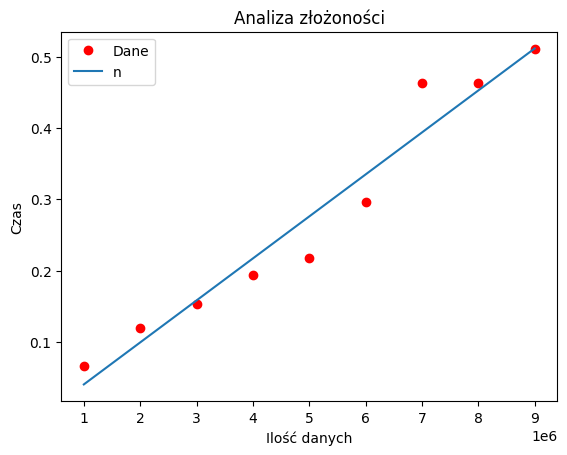

In [58]:
x_range = numpy.arange(n2[0],n2[-1],100)

popt2, pcov2 = curve_fit(func,n2,times2)
print("a = %s , b = %s" % (popt2[0], popt2[1]))

plt.plot(n2,times2,'ro',label="Dane")
plt.plot(x_range,func(x_range,*popt2),label="n")
plt.xlabel("Ilość danych")
plt.ylabel("Czas")
plt.legend(loc='upper left')
plt.title("Analiza złożoności")
plt.show()

Teraz możemy z małym błędem przewidzieć że dla serii 800000 elementów funkcja zajmie

In [62]:
print(func(1000000,*popt2))
print(get_time2(sequence(1000000)))

0.04039729518178002
0.03335118293762207


<h3>Example 3</h3>


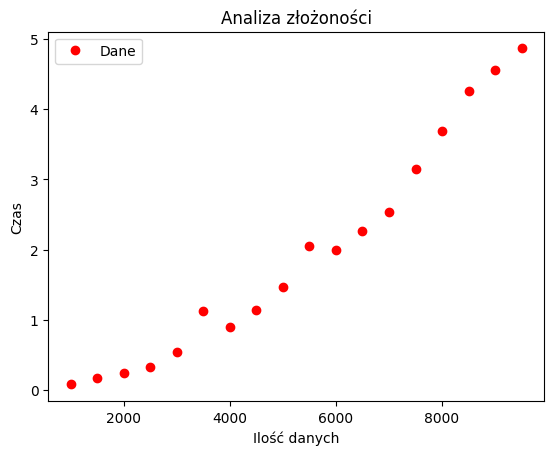

In [37]:
n3 = [n*100 for n in range(10,100,5)]
times3 = [get_time3(sequence(el)) for el in n3]

plt.plot(n3,times3,'ro',label="Dane")
plt.xlabel("Ilość danych")
plt.ylabel("Czas")
plt.legend(loc='upper left')
plt.title("Analiza złożoności")
plt.show()

Na podstawie wykresu i funkcji można wywnioskować, że dane będą się układały na kształt parabolii

a = 5.046157811985502e-08, b = 4.668595738015538e-05, c = -0.011148475345069622


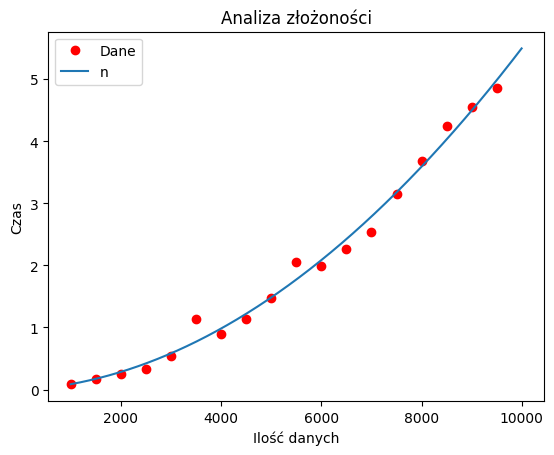

In [38]:
def func2(x,a,b,c):
    return a*x**2+b*x+c

x_range = numpy.arange(n3[0],n3[-1],10)

popt3, pcov3 = curve_fit(func2,n3,times3)
print("a = %s, b = %s, c = %s" % (popt3[0], popt3[1], popt3[2]))

plt.plot(n3,times3,'ro',label="Dane")
plt.plot(x_range,func2(x_range,*popt3),label="n")
plt.xlabel("Ilość danych")
plt.ylabel("Czas")
plt.legend(loc='upper left')
plt.title("Analiza złożoności")
plt.show()

In [42]:
print(func2(10005,*popt3))
print(get_time3(sequence(10005)))

5.507149759580325
5.588923215866089


<h3>Example 4</h3>


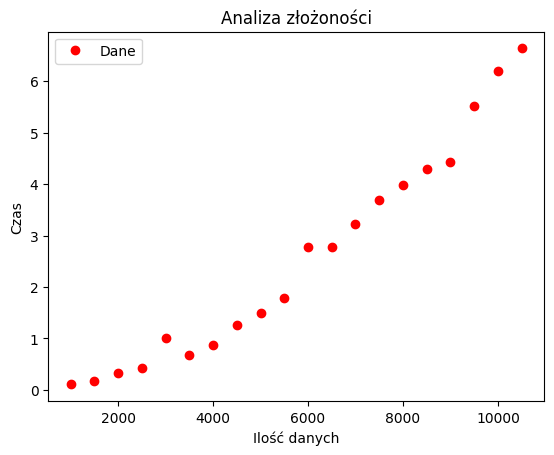

In [76]:
n4 = [n*100 for n in range(10,110,5)]

times4 = [get_time4(sequence(el),sequence(el)) for el in n4]

plt.plot(n4,times4,'ro',label="Dane")
plt.xlabel("Ilość danych")
plt.ylabel("Czas")
plt.legend(loc='upper left')
plt.title("Analiza złożoności")
plt.show()

W kodzie mamy pętlę o długości (n+1)/2 w pętli o długości n w pętli o długości n, czyli złożoność będzie w formie n* n*(n+1)/2 czyli 1/2*n^3 + 1/2*n^2

a = -4.659897751446377e-13, b = 6.159868748079173e-08, c = 3.2130872668068124e-05, d = 0.004702778407784786


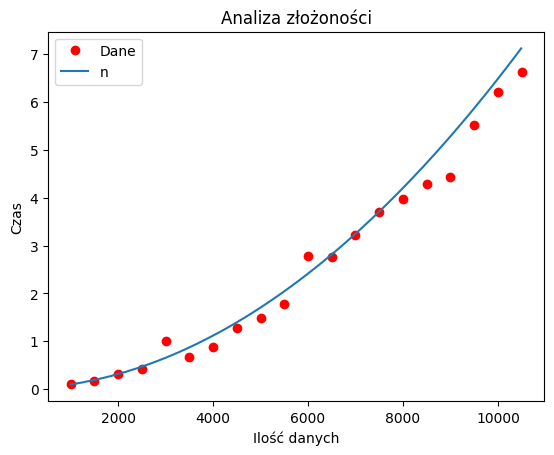

In [81]:
def func3(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d
x_range = numpy.arange(n4[0],n4[-1],10)

popt4, pcov4 = curve_fit(func3,n4,times4)
print("a = %s, b = %s, c = %s, d = %s" % (popt4[0], popt4[1], popt4[2], popt4[3]))

plt.plot(n4,times4,'ro',label="Dane")
plt.plot(x_range,func3(x_range,*popt4),label="n")
plt.xlabel("Ilość danych")
plt.ylabel("Czas")
plt.legend(loc='upper left')
plt.title("Analiza złożoności")
plt.show()